In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


# COVID-19 World Vaccination Progress/country_vaccinations.csv

In [2]:
data = pd.read_csv("datasets/COVID-19 World Vaccination Progress/country_vaccinations.csv")
usa_values=data.loc[data['iso_code']=='USA']
usa_values=usa_values.fillna(method="ffill")
# usa_values=usa_values.fillna(method="bfill")
usa_values=usa_values.fillna(0)
usa_values=usa_values.drop(columns=['vaccines', 'source_name','source_website'])

# printing nan
print(usa_values.isna().sum())


country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
dtype: int64


## Box plot to detect outliers

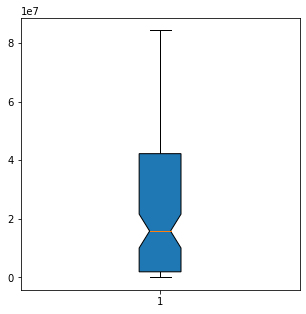

In [3]:
# No outliers in people fully vaccinated
plt.figure(figsize=(5, 5))
plt.boxplot(usa_values['people_fully_vaccinated'], notch=True, patch_artist=True)
plt.show()

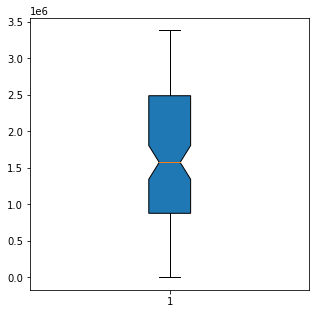

In [4]:
# No outliers in daily vaccinations
plt.figure(figsize=(5, 5))
plt.boxplot(usa_values['daily_vaccinations'], notch=True, patch_artist=True)
plt.show()

In [5]:
usa_values.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
12061,United States,USA,2020-12-20,556208.0,556208.0,0.0,0.0,0.0,0.17,0.17,0.0,0.0
12062,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,57909.0,0.18,0.18,0.0,173.0
12063,United States,USA,2020-12-22,614117.0,614117.0,0.0,57909.0,127432.0,0.18,0.18,0.0,381.0
12064,United States,USA,2020-12-23,1008025.0,1008025.0,0.0,57909.0,150606.0,0.30,0.30,0.0,450.0
12065,United States,USA,2020-12-24,1008025.0,1008025.0,0.0,57909.0,191001.0,0.30,0.30,0.0,571.0


In [6]:
usa_values=usa_values[['date','total_vaccinations','people_vaccinated','people_fully_vaccinated']]
usa_values.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
12061,2020-12-20,556208.0,556208.0,0.0
12062,2020-12-21,614117.0,614117.0,0.0
12063,2020-12-22,614117.0,614117.0,0.0
12064,2020-12-23,1008025.0,1008025.0,0.0
12065,2020-12-24,1008025.0,1008025.0,0.0


In [7]:
import os
if not os.path.exists('cleaned/COVID-19 World Vaccination Progress'):
    os.makedirs('cleaned/COVID-19 World Vaccination Progress')
f=open(f'cleaned/COVID-19 World Vaccination Progress/country_vaccinations.csv', "w")
usa_values.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

In [8]:
data = usa_values['total_vaccinations']
normalized_arr = preprocessing.normalize([data])
usa_values['total_vaccinations']=normalized_arr[0]
data = usa_values['people_vaccinated']
normalized_arr = preprocessing.normalize([data])
usa_values['people_vaccinated']=normalized_arr[0]
data = usa_values['people_fully_vaccinated']
normalized_arr = preprocessing.normalize([data])
usa_values['people_fully_vaccinated']=normalized_arr[0]

In [9]:
usa_values.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
12061,2020-12-20,0.000533,0.000818,0.0
12062,2020-12-21,0.000588,0.000904,0.0
12063,2020-12-22,0.000588,0.000904,0.0
12064,2020-12-23,0.000966,0.001483,0.0
12065,2020-12-24,0.000966,0.001483,0.0


In [10]:
import os
if not os.path.exists('cleaned/COVID-19 World Vaccination Progress'):
    os.makedirs('cleaned/COVID-19 World Vaccination Progress')
f=open(f'cleaned/COVID-19 World Vaccination Progress/country_vaccinations_normalized.csv', "w")
usa_values.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

In [11]:
usa_values['date'] = pd.to_datetime(usa_values.date)

groupedByMonth=usa_values.groupby(pd.Grouper(key='date', freq='1M')).sum().reset_index()
groupedByMonth.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-12-31,0.017759,0.027280,0.000000
1,2021-01-31,0.419314,0.559660,0.141341
2,2021-02-28,1.406481,1.554059,1.041775
3,2021-03-31,3.324485,3.335321,3.190814
4,2021-04-30,3.124540,3.063121,3.287103


In [12]:
import os
if not os.path.exists('cleaned/COVID-19 World Vaccination Progress'):
    os.makedirs('cleaned/COVID-19 World Vaccination Progress')
f=open(f'cleaned/COVID-19 World Vaccination Progress/country_vaccinations_normalized_grouped_by_month.csv', "w")
groupedByMonth.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

# us-daily-vaccines.csv

In [13]:
us_daily_vaccines=pd.read_csv("datasets/us-daily-vaccines.csv")


states_to_exclude=["American Samoa","Bureau of Prisons","Dept of Defense","District of Columbia","Federated States of Micronesia","Guam","Indian Health Svc","Long Term Care","Marshall Islands","Northern Mariana Islands","Puerto Rico","Republic of Palau","Veterans Health","United States","Virgin Islands"]

us_daily_vaccines=us_daily_vaccines.drop(columns=['Code'])

count =0
for s in states_to_exclude:
    us_daily_vaccines=us_daily_vaccines[us_daily_vaccines['Entity']!=states_to_exclude[count]]
    count+=1

# printing nan
print(us_daily_vaccines.isna().sum())
us_daily_vaccines.describe()


Entity                0
Day                   0
daily_vaccinations    0
dtype: int64


,daily_vaccinations
count,5050.000000
mean,40493.919010
std,53026.532755
min,0.000000
25%,10468.250000
50%,23898.500000
75%,48924.000000
max,494575.000000


In [14]:
us_daily_vaccines.head()

,Entity,Day,daily_vaccinations
0,Alabama,2021-01-13,5906
1,Alabama,2021-01-14,7083
2,Alabama,2021-01-15,7478
3,Alabama,2021-01-16,7498
4,Alabama,2021-01-17,7509


## Boxplot to detect outliers. 

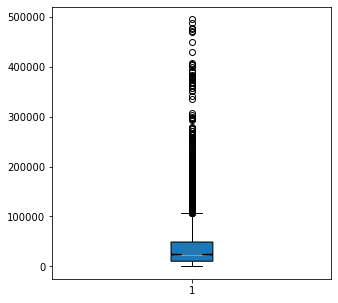

In [15]:
plt.figure(figsize=(5, 5))
plt.boxplot(us_daily_vaccines['daily_vaccinations'], notch=True, patch_artist=True)
plt.show()


### Hide outliers

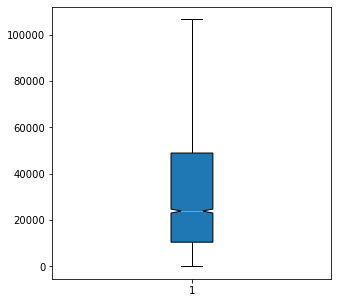

In [16]:
plt.figure(figsize=(5, 5))
plt.boxplot(us_daily_vaccines['daily_vaccinations'], notch=True, patch_artist=True, showfliers=False)
plt.show()

## IQR range to find statistical dispersion.

In [17]:
from scipy.stats import iqr

data = us_daily_vaccines['daily_vaccinations']
iqr(data, axis=0)


38455.75

In [18]:
'''
Warning!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
every time you run this block it will remove outliers assumed to be in Q3
'''
print(us_daily_vaccines.shape)
#find Q1, Q3, and interquartile range for each column
Q1 =  us_daily_vaccines["daily_vaccinations"].quantile(q=.25)
Q3 =  us_daily_vaccines["daily_vaccinations"].quantile(q=.75)
IQR = us_daily_vaccines["daily_vaccinations"].apply(iqr)
print(Q1)
print(Q3)
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
us_daily_vaccines = us_daily_vaccines[~((us_daily_vaccines["daily_vaccinations"] > (Q3+1.5*IQR)))]

print(us_daily_vaccines.shape)


(5050, 3)
10468.25
48924.0
(3787, 3)


## Boxplot graph without outliers

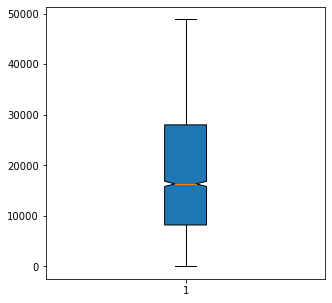

In [19]:
plt.figure(figsize=(5, 5))
plt.boxplot(us_daily_vaccines['daily_vaccinations'], notch=True, patch_artist=True)
plt.show()

## group by month whole USA (discretize data)

In [20]:
us_daily_vaccines['Day'] = pd.to_datetime(us_daily_vaccines.Day)

groupedByMonth=us_daily_vaccines.groupby(pd.Grouper(key='Day', freq='1M')).sum().reset_index()
groupedByMonth.head()

,Day,daily_vaccinations
0,2021-01-31,11931240
1,2021-02-28,22411094
2,2021-03-31,23155738
3,2021-04-30,14708084


In [21]:
import os
if not os.path.exists('cleaned'):
    os.makedirs('cleaned')
f=open(f'cleaned/us-daily-vaccines-discretize-not-normalized.csv', "w")
groupedByMonth.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()


In [22]:
data = groupedByMonth['daily_vaccinations']
normalized_arr = preprocessing.normalize([data])
groupedByMonth['daily_vaccinations'] = normalized_arr[0]


In [23]:
import os
if not os.path.exists('cleaned'):
    os.makedirs('cleaned')
f=open(f'cleaned/us-daily-vaccines-discretize-normalized.csv', "w")
groupedByMonth.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

## Graph normal distribution of the dataset

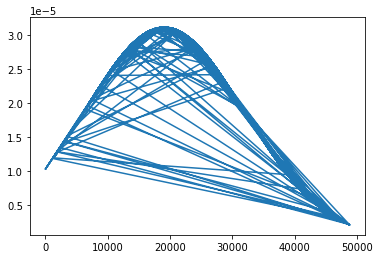

In [24]:
from scipy.stats import norm
import statistics

data = us_daily_vaccines['daily_vaccinations']
mean = statistics.mean(data)
sd = statistics.stdev(data)
# norm.pdf(data, mean, sd)
# plt.plot(norm.pdf(data, mean, sd))
# plt.show()
plt.plot(data, norm.pdf(data, mean, sd))
# plt.show()

## Preprocess and normalize the data

[[0.00417842 0.00501113 0.00529058 ... 0.00159892 0.00205525 0.00175669]]


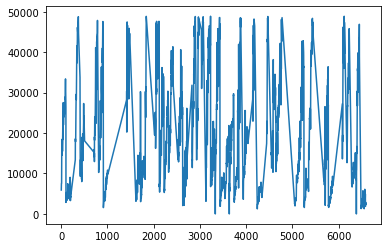

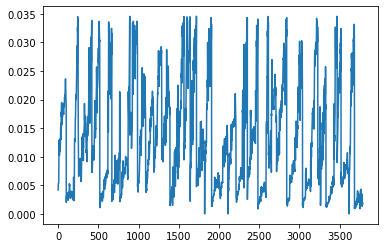

In [25]:
data = us_daily_vaccines['daily_vaccinations']
normalized_arr = preprocessing.normalize([data])
print(normalized_arr)

plt.plot( us_daily_vaccines['daily_vaccinations'])
plt.show()
plt.plot(normalized_arr[0])
plt.show()

In [26]:
import os
if not os.path.exists('cleaned'):
    os.makedirs('cleaned')
f=open(f'cleaned/us-daily-vaccines.csv', "w")
us_daily_vaccines.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

In [27]:
us_daily_vaccines['daily_vaccinations'] = normalized_arr[0]
import os
if not os.path.exists('cleaned'):
    os.makedirs('cleaned')
f=open(f'cleaned/us-daily-vaccines-normalized.csv', "w")
us_daily_vaccines.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

# Novel Corona Virus 2019 Dataset/covid_19_data.csv


In [28]:
data = pd.read_csv("datasets/Novel Corona Virus 2019 Dataset/covid_19_data.csv")
data=data[data["Country/Region"]=="US"]
display(data)



# printing nan
print(data.isna().sum())



,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
235983,235984,02/27/2021,Virginia,US,2021-02-28 05:22:20,574314.0,8382.0,0.0
235993,235994,02/27/2021,Washington,US,2021-02-28 05:22:20,339773.0,4956.0,0.0
235996,235997,02/27/2021,West Virginia,US,2021-02-28 05:22:20,131580.0,2297.0,0.0
235998,235999,02/27/2021,Wisconsin,US,2021-02-28 05:22:20,616886.0,7014.0,0.0


SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


combine the values of all the states for every day

In [29]:
from datetime import datetime

dates=list(data['ObservationDate'].unique())
dates.sort(key=lambda date: datetime.strptime(date, "%m/%d/%Y"))

cleaned = pd.DataFrame({'ObservationDate':[],'Confirmed':[],'Deaths':[],'Recovered':[]})
for d in dates:
    temp=data[data["ObservationDate"]==d]
    d=datetime.strptime(d, "%m/%d/%Y")
    d=d.strftime('%Y-%m-%d')
    cleaned.loc[len(cleaned.index)] = [d, temp['Confirmed'].sum(),temp['Deaths'].sum(),temp['Recovered'].sum()] 


## Boxplots to detect outliers. 

<Figure size 720x720 with 0 Axes>

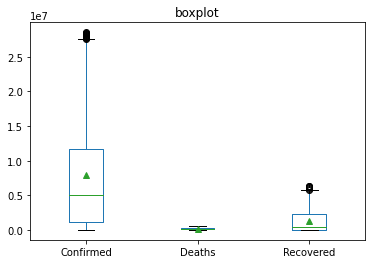

In [30]:
plt.figure(figsize=(10, 10))
ax = cleaned[['Confirmed', 'Deaths', 'Recovered']].plot(kind='box', title='boxplot', showmeans=True)
plt.show()

In [31]:
'''
Warning!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
every time you run this block it will remove outliers assumed to be in Q3
'''
print(cleaned.shape)
#find Q1, Q3, and interquartile range for each column
Q1 =  cleaned["Confirmed"].quantile(q=.25)
Q3 =  cleaned["Confirmed"].quantile(q=.75)
IQR = cleaned["Confirmed"].apply(iqr)
print(Q1)
print(Q3)
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
cleaned = cleaned[~((cleaned["Confirmed"] > (Q3+1.5*IQR)))]

print(cleaned.shape)


(403, 4)
1119067.5
11728658.0
(302, 4)


## Boxplot graph without outliers

<Figure size 720x720 with 0 Axes>

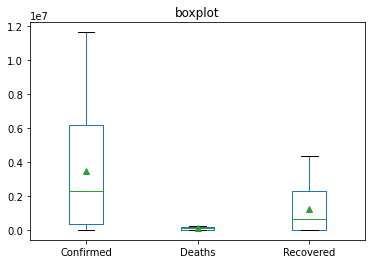

In [32]:
plt.figure(figsize=(10, 10))
ax = cleaned[['Confirmed', 'Deaths', 'Recovered']].plot(kind='box', title='boxplot', showmeans=True)
plt.show()

In [33]:
import os
if not os.path.exists('cleaned/Novel Corona Virus 2019 Dataset'):
    os.makedirs('cleaned/Novel Corona Virus 2019 Dataset')
f=open(f'cleaned/Novel Corona Virus 2019 Dataset/covid_19_data.csv', "w")
cleaned.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

## group by month (discretize data)

In [34]:
cleaned['ObservationDate'] = pd.to_datetime(cleaned.ObservationDate)

groupedByMonth=cleaned.groupby(pd.Grouper(key='ObservationDate', freq='1M')).sum().reset_index()



In [35]:
import os
if not os.path.exists('cleaned/Novel Corona Virus 2019 Dataset'):
    os.makedirs('cleaned/Novel Corona Virus 2019 Dataset')
f=open(f'cleaned/Novel Corona Virus 2019 Dataset/covid_19_data_grouped_by_month.csv', "w")
groupedByMonth.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

## normalize

In [36]:
cleaned["Confirmed"] = (preprocessing.normalize([cleaned["Confirmed"]]))[0]
print(cleaned["Confirmed"])
cleaned["Deaths"] = preprocessing.normalize([cleaned["Deaths"]])[0]
print(cleaned["Deaths"])
cleaned["Recovered"] = preprocessing.normalize([cleaned["Recovered"]])[0]
print(cleaned["Recovered"])

0      1.206438e-08
1      1.206438e-08
2      2.412876e-08
3      2.412876e-08
4      6.032191e-08
           ...     
297    1.326864e-01
298    1.343287e-01
299    1.362891e-01
300    1.382607e-01
301    1.403460e-01
Name: Confirmed, Length: 302, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
297    0.101808
298    0.102124
299    0.102471
300    0.103181
301    0.103979
Name: Deaths, Length: 302, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
297    0.134397
298    0.135254
299    0.137519
300    0.139101
301    0.140952
Name: Recovered, Length: 302, dtype: float64


In [37]:
import os
if not os.path.exists('cleaned/Novel Corona Virus 2019 Dataset'):
    os.makedirs('cleaned/Novel Corona Virus 2019 Dataset')
f=open(f'cleaned/Novel Corona Virus 2019 Dataset/covid_19_data_normalized.csv', "w")
cleaned.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

# Countries population by year 2020


In [38]:
data = pd.read_csv("datasets/Countries population by year 2020/population_by_country_2020.csv")
data=data[data["Country (or dependency)"]=="United States"]
data=data[["Country (or dependency)","Population (2020)","Density (P/Km²)","Med. Age"]]
data.head()


,Country (or dependency),Population (2020),Density (P/Km²),Med. Age
2,United States,330610570,36,38


In [39]:
import os
if not os.path.exists('cleaned/Countries population by year 2020'):
    os.makedirs('cleaned/Countries population by year 2020')
f=open(f'cleaned/Countries population by year 2020/population_by_country_2020.csv', "w")
data.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()